In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import ariel_load
import ariel_model
import copy
import tqdm
kgs.sanity_checks_active = True
kgs.sanity_checks_without_errors = True

local


In [2]:
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

In [3]:
data = train_data[[d.planet_id for d in train_data].index(1349926825)]
loaders = ariel_load.default_loaders()
for ii in range(2):
    loaders[ii].apply_pixel_corrections.mask_hot = True
    loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning()
loaders[1].apply_full_sensor_corrections.inpainting_wavelength = True
data.load_to_step(0, loaders)
data.load_to_step(5, loaders)

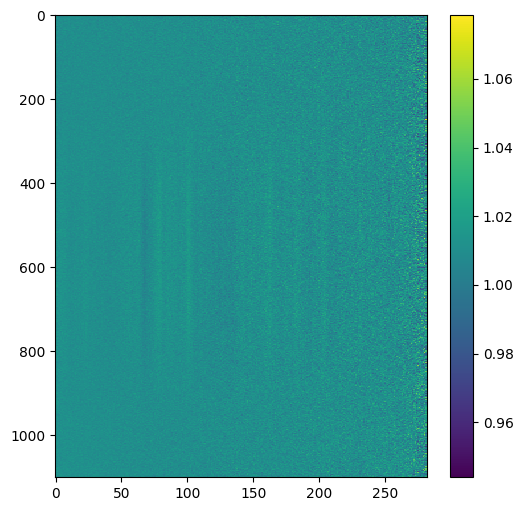

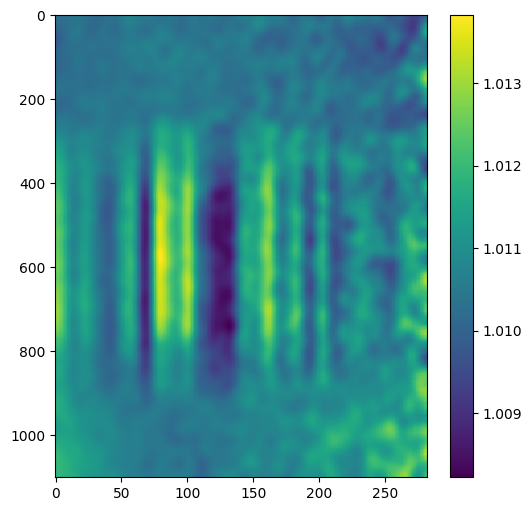

In [4]:
import cupy as cp
NN=25
dat1 = data.transits[1].data[1].data[:-NN,...]
dat2 = data.transits[0].data[1].data[NN:,...]
#dat1 = dat1/cp.mean(dat1,0)
#dat2 = dat2*cp.mean(dat1,0)/cp.mean(dat2,0)
diff = (dat1 / dat2).get()
#diff = diff-np.mean(diff,0)
plt.figure(figsize=(6,6))
plt.imshow(diff, aspect='auto', interpolation='none')
plt.colorbar()
plt.figure(figsize=(6,6))
plt.imshow(kgs.gaussian_2D_filter_with_nans(diff, [15,4]), aspect='auto', interpolation='none')
plt.colorbar()

/mnt/d/ariel2/code/core/kaggle_support.py:228: RuntimeWarning: invalid value encountered in divide
  Z=VV/WW


AssertionError: 

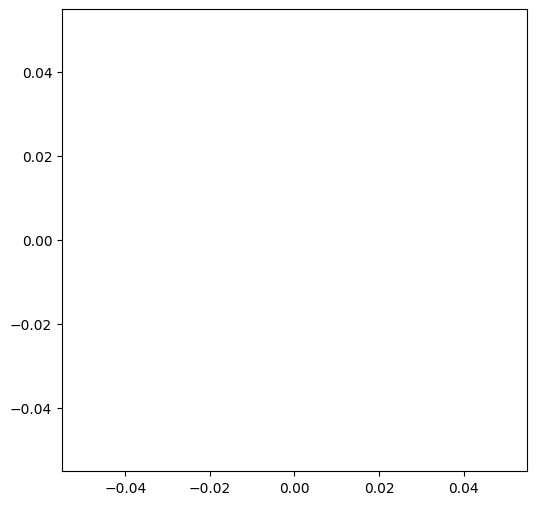

<Figure size 600x600 with 0 Axes>

In [5]:
import cupy as cp
NN=np.round(25*1350/1125).astype(int)
dat1 = data.transits[1].data[0].data[:-NN,...]
dat2 = data.transits[0].data[0].data[NN:,...]
#dat1 = dat1/cp.mean(dat1,0)
#dat2 = dat2*cp.mean(dat1,0)/cp.mean(dat2,0)
diff = (dat1 / dat2).get()
#diff = diff-np.mean(diff,0)
plt.figure(figsize=(6,6))
plt.plot(diff)
diff.shape
plt.figure(figsize=(6,6))
plt.plot(kgs.gaussian_2D_filter_with_nans(diff, [30,0.001]))